# DBSCAN - rice_ml
This notebook demonstrates how to use the DBSCAN class within the rice_ml package. It demonstrates it in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note: In practical applications, unsupervised models often require careful hyperparameter selection and evaluation using appropriate clustering or stability metrics. In some cases, multiple runs with different initializations may be necessary to assess robustness.

This notebook shows how to:
- Use 'DBSCAN' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate DBSCAN

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Model Training](#model-training)
- [Results](#results)

## Algorithm
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is an unsupervised clustering algorithm that groups data points based on regions of high density rather than distance to a centroid. Unlike K-means, DBSCAN does not require specifying the number of clusters in advance and is capable of identifying noise points that do not belong to any cluster.

The algorithm works by defining clusters as connected regions of high point density. Given two parameters, eps (the neighborhood radius) and min_samples (the minimum number of points required to form a dense region), DBSCAN classifies points as core points, border points, or noise. Clusters are formed by expanding outward from core points and including all points that are density-reachable from them.

![DBSCAN Example](../images/dbscan.webp)
Source: [Geeks For Geeks](https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/)

This visualization highlights a key difference between DBSCAN and K-means. While K-means partitions all points into a fixed number of clusters based on distance to centroids, DBSCAN groups points based on local density and leaves low-density points unassigned as noise. As a result, DBSCAN can correctly identify clusters with non-spherical shapes and explicitly detect outliers, whereas K-means struggles in these settings and forces all points into clusters.

Because DBSCAN relies on distance to determine neighborhood density, feature scaling plays an important role in its performance. Normalization is typically applied so that distance calculations are meaningful across all dimensions.

For example, when clustering spatial or geometric data, DBSCAN can discover clusters of arbitrary shape and effectively separate dense regions from sparse noise. This makes it particularly useful in cases where clusters are not well-represented by simple geometric boundaries.

### Pros vs Cons
#### Pros
- Does not require specifying the number of clusters in advance
- Can identify clusters of arbitrary shape
- Explicitly detects noise and outliers
#### Cons
- Sensitive to the choice of 'eps' and 'min_samples'
- Struggles with datasets of varying density
- Less effective in high-dimensional spaces
- Distance metric choice can significantly affect results

## Data Preparation
We will be using a synthetic clustering dataset generated with make_moons. This dataset consists of 500 two-dimensional data points arranged into two interleaving, crescent-shaped clusters, with a small amount of noise added to each point.

Synthetic moons data is commonly used to demonstrate density-based clustering algorithms because the cluster structure is non-linear and not well-suited to centroid-based methods. In this example, the true cluster labels are not used during training and are included only for reference.

X shape: (500, 2)
X Overall Summary:
Min: -1.079
Max: 2.084
Mean: 0.378
Std: 0.720
Before normalization:
Mean (first 5 features): [0.5  0.25]
Std  (first 5 features): [0.87 0.5 ]
Min  (first 5 features): [-1.07903901 -0.60508341]
Max  (first 5 features): [2.08361396 1.11177381]


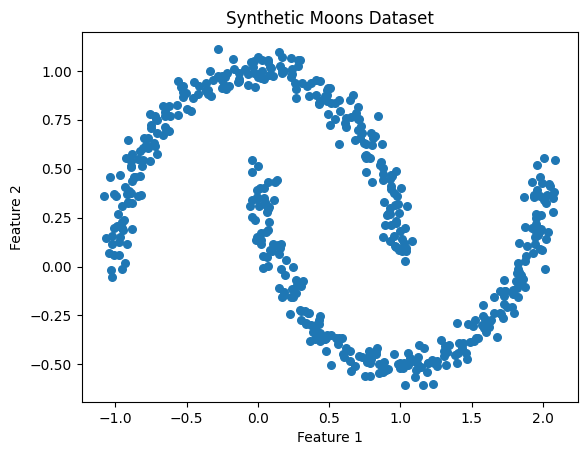

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

X, _ = make_moons(
    n_samples=500,
    noise=0.05,
    random_state=42
)

X = np.asarray(X)

print("X shape:", X.shape)

print("X Overall Summary:")
print(f"Min: {X.min():.3f}")
print(f"Max: {X.max():.3f}")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

print("Before normalization:")
print("Mean (first 5 features):", np.round(X.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X.std(axis=0)[:5], 2))
print("Min  (first 5 features):", X.min(axis=0)[:5])
print("Max  (first 5 features):", X.max(axis=0)[:5])

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We can see four clear clusters. This is very clean data and the model should be able to cluster these four very easily. We will use k=4 in our model because of this clear separation.

## Model Training
Note that since this is unsupervised, there is no splitting of the data.

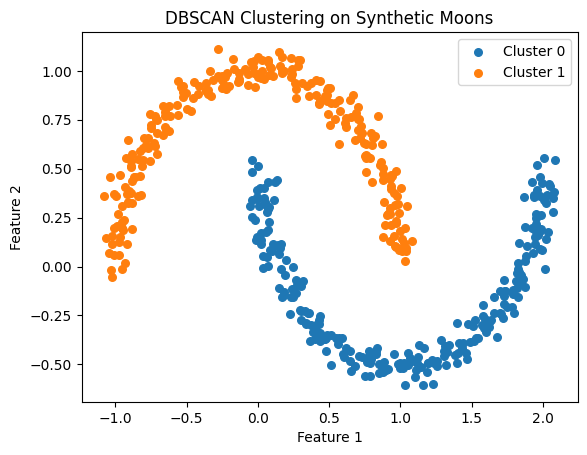

In [2]:
from rice_ml.unsupervised_learning.dbscan import DBSCAN
from rice_ml.utilities import normalize

model = DBSCAN(
    eps=0.3,
    min_samples=5
)

model.fit(X)

labels = model.labels_

unique_labels = np.unique(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:
        plt.scatter(
            X[mask, 0],
            X[mask, 1],
            c="black",
            s=30,
            label="Noise"
        )
    else:
        plt.scatter(
            X[mask, 0],
            X[mask, 1],
            s=30,
            label=f"Cluster {label}"
        )

plt.title("DBSCAN Clustering on Synthetic Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

The clustering results show that DBSCAN was able to clearly identify two distinct groups in the data. Each cluster follows a non-linear, crescent-shaped structure, which aligns well with the assumptions of the DBSCAN algorithm. Because DBSCAN is density-based, it is able to group points that form arbitrary shapes rather than relying on spherical clusters.

Overall, the results demonstrate a strong clustering outcome: points within each cluster are densely connected, while the clusters themselves remain well separated. This makes the cluster assignments both visually intuitive and algorithmically sound.

We are going to apply a normalization as well and see what the outcome is.

#### Z-Score Normalization

After zscore normalization:
Mean (first 5 features): [-0.  0.]
Std  (first 5 features): [1. 1.]
Min  (first 5 features): [-1.82 -1.72]
Max  (first 5 features): [1.82 1.73]


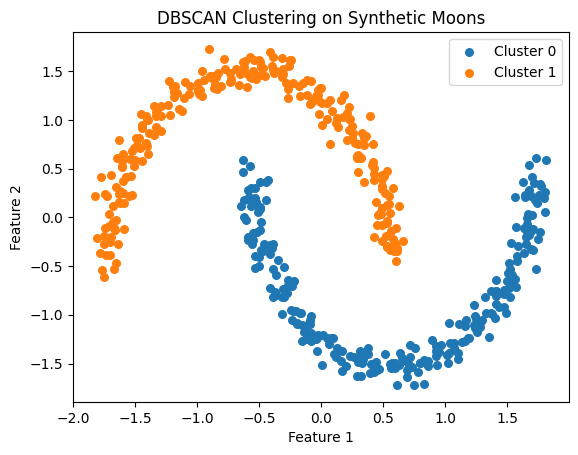

In [3]:
X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = DBSCAN(
    eps=0.3,
    min_samples=5
)

model.fit(X_norm)

labels = model.labels_

unique_labels = np.unique(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:
        plt.scatter(
            X_norm[mask, 0],
            X_norm[mask, 1],
            c="black",
            s=30,
            label="Noise"
        )
    else:
        plt.scatter(
            X_norm[mask, 0],
            X_norm[mask, 1],
            s=30,
            label=f"Cluster {label}"
        )

plt.title("DBSCAN Clustering on Synthetic Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Results
The normalization produces very similar results. The data is well structured and clearly separated, so DBSCAN is able to identify the underlying clusters without difficulty.

A challenging part of this algorithm is choosing appropriate values for eps and min_samples, especially when the true density of the data is unknown. It is recommended to visualize the data first and experiment with different neighborhood sizes to see how cluster formation changes. Small changes in these parameters can significantly affect the outcome, including how many points are classified as noise.

Below is an example of using a poorly chosen eps value. In this case, the algorithm either merges distinct regions into a single cluster or labels a large portion of the data as noise, making it clear that the parameter choice is incorrect.

After zscore normalization:
Mean (first 5 features): [-0.  0.]
Std  (first 5 features): [1. 1.]
Min  (first 5 features): [-1.82 -1.72]
Max  (first 5 features): [1.82 1.73]


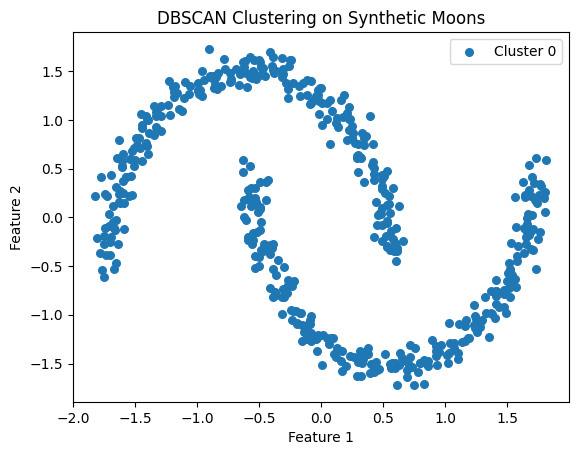

In [7]:
X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = DBSCAN(
    eps=1.5,
    min_samples=5
)

model.fit(X_norm)

labels = model.labels_

unique_labels = np.unique(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:
        plt.scatter(
            X_norm[mask, 0],
            X_norm[mask, 1],
            c="black",
            s=30,
            label="Noise"
        )
    else:
        plt.scatter(
            X_norm[mask, 0],
            X_norm[mask, 1],
            s=30,
            label=f"Cluster {label}"
        )

plt.title("DBSCAN Clustering on Synthetic Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

We can see that a high eps resulted in the model finding just one cluster. A poorly chosen eps value can significantly affect DBSCAN’s performance. If eps is too small, most points are classified as noise. If eps is too large, distinct clusters may be merged together. Selecting an appropriate neighborhood radius is therefore critical to obtaining meaningful results.

Below we will also see how k-means clustering models this data.

After zscore normalization:
Mean (first 5 features): [-0.  0.]
Std  (first 5 features): [1. 1.]
Min  (first 5 features): [-1.82 -1.72]
Max  (first 5 features): [1.82 1.73]


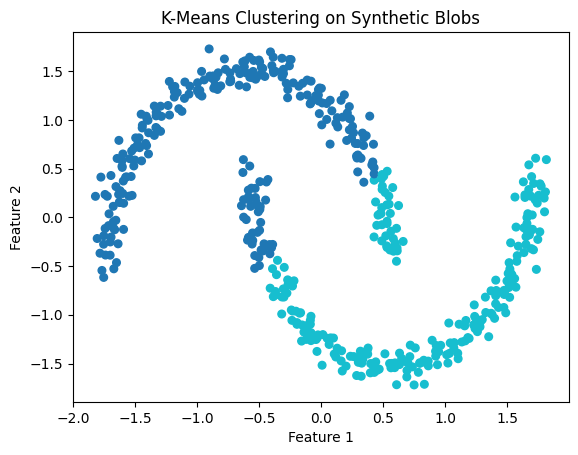

In [10]:
from rice_ml.unsupervised_learning.k_means_clustering import KMeans

X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = KMeans(
    n_clusters=2,
    max_iter=100,
    tol=1e-4,
    random_state=42
)

model.fit(X_norm)

labels = model.predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap="tab10", s=30)
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We can see that K-means clustering struggles with this data. It gets large chunks correct, but struggles when the two clusters get close to each other. The clusters are not spherical, so K-means does not perform well. This is a major difference between the two models. As shown in the example image in the algorithm description, K-means works much better for spherical clusters, while DBSCAN works much better for non-spherical, density-based cluster structures.

## Conclusion
Overall, we can see that DBSCAN clustering works very well when data contains clear density-based structure. When cluster shapes are irregular, choosing appropriate parameters is crucial, as small changes can significantly affect the outcome.

We can also see the effect of using a poorly chosen eps value, as the algorithm may either label too many points as noise or merge distinct clusters together. This highlights the importance of understanding the scale and density of the data.

This is a flexible clustering model and is a strong choice when cluster shape is unknown and when identifying noise or outliers is important.